<a href="https://colab.research.google.com/github/Ornela88/Eniac_DISCOUNT/blob/main/Copia_Ornela_Eniac_DISCOUNT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Initializing


In [1]:
import pandas as pd

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_df = pd.read_csv(path)

# orders_df.csv
path = "https://raw.githubusercontent.com/Tehnik762/Eniac_DS1/DataCSV/orders_qu.csv"
orders_df = pd.read_csv(path)

# orderlines_df.csv
path = "https://raw.githubusercontent.com/Tehnik762/Eniac_DS1/DataCSV/orderlines_qu.csv"
orderlines_df = pd.read_csv(path)

# brands_cl.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [4]:
orders_df["created_date"] = pd.to_datetime(orders_df["created_date"] )

In [5]:
orders = orders_df.copy()
orderlines = orderlines_df.copy()
products = products_df.copy()

*testo in corsivo*# Ornela

In [7]:
#1 What is the time period that the dataset covers?

min_orders_date = orders['created_date'].min()
max_orders_date = orders['created_date'].max()

print("Beginning of the dataset period:", min_orders_date)
print("End of the dataset period:", max_orders_date)

time_period_orders = max_orders_date - min_orders_date

print(time_period_orders)

print(min_orders_date)
print(max_orders_date)

Beginning of the dataset period: 2017-01-01 01:51:47
End of the dataset period: 2018-03-14 12:03:52
437 days 10:12:05
2017-01-01 01:51:47
2018-03-14 12:03:52


In [8]:
#2 What is the overall revenue for that time?

# 2.1 Calculate the total revenue and the AVG revenue for the entire dataset
total_revenue = orders['total_paid'].sum()
average_revenue = orders['total_paid'].mean()
print("Overall revenue",round(total_revenue,2), "and average revenue", round(average_revenue,2))



Overall revenue 7978675.6 and average revenue 194.67


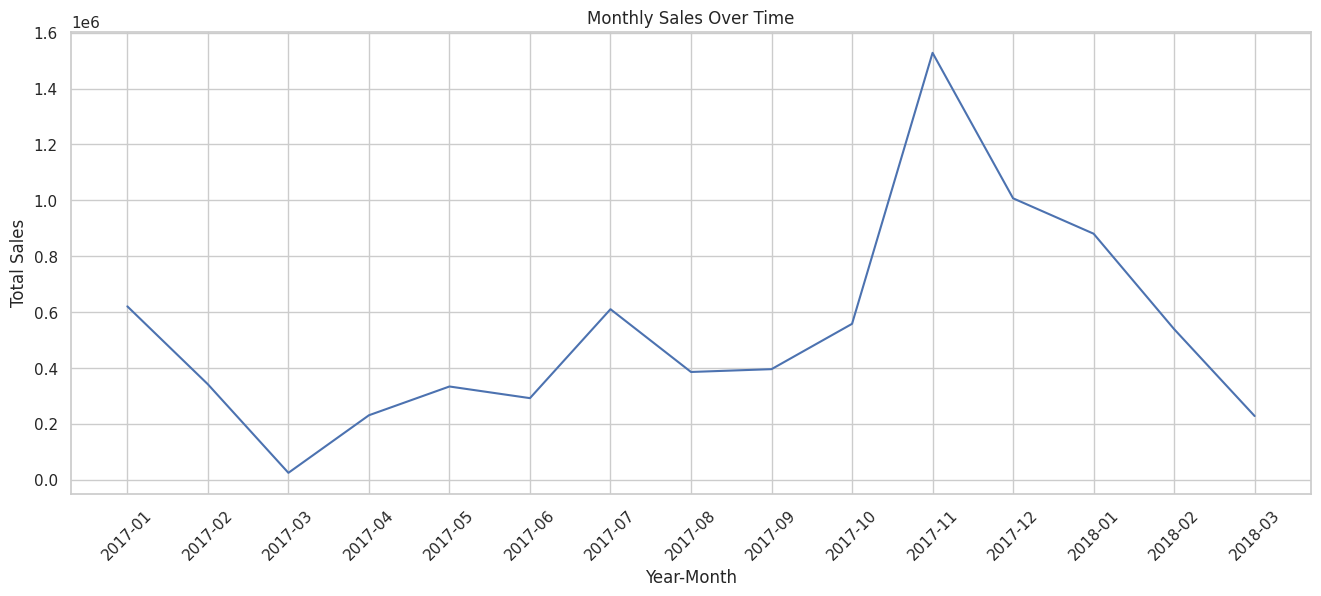

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

orders['Year'] = orders['created_date'].dt.year
orders['Month'] = orders['created_date'].dt.month

# Group by year and month, and calculate the total paid for each month
monthly_sales = orders.groupby(['Year', 'Month'])['total_paid'].sum().reset_index()

# Create a new DataFrame with the 'total_paid' column and a 'Year-Month' column
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

# Now you can proceed with your plotting code
plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='total_paid')
plt.xticks(rotation=45)
plt.title('Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Year-Month')
plt.show()


In [10]:
orders['week'] = orders['created_date'].dt.isocalendar().week
orders['year'] = orders['created_date'].dt.year

# # Group the data by week and year and calculate the total sales for each week in each year
weekly_sales = orders.groupby([orders['week'], orders['year']])['total_paid'].sum()

# # Calculate the average sales for each week in each year
average_weekly_sales = weekly_sales.mean()

# # Print the weekly sales and average weekly sales
print("Weekly Sales in 15 Months:")
print(weekly_sales)
print("Average Weekly Sales in 15 Months:", round(average_weekly_sales,2))

#weekly_sales.head(2)
#weekly_sales.info()

Weekly Sales in 15 Months:
week  year
1     2017    146333.55
      2018    229278.74
2     2017    151629.11
      2018    203229.97
3     2017    116630.12
                ...    
48    2017    317820.69
49    2017    128940.18
50    2017    259275.91
51    2017    267001.12
52    2017    328510.88
Name: total_paid, Length: 63, dtype: float64
Average Weekly Sales in 15 Months: 126645.64


In [ ]:
#weekly_sales.to_frame().plot(figsize=(15,6))


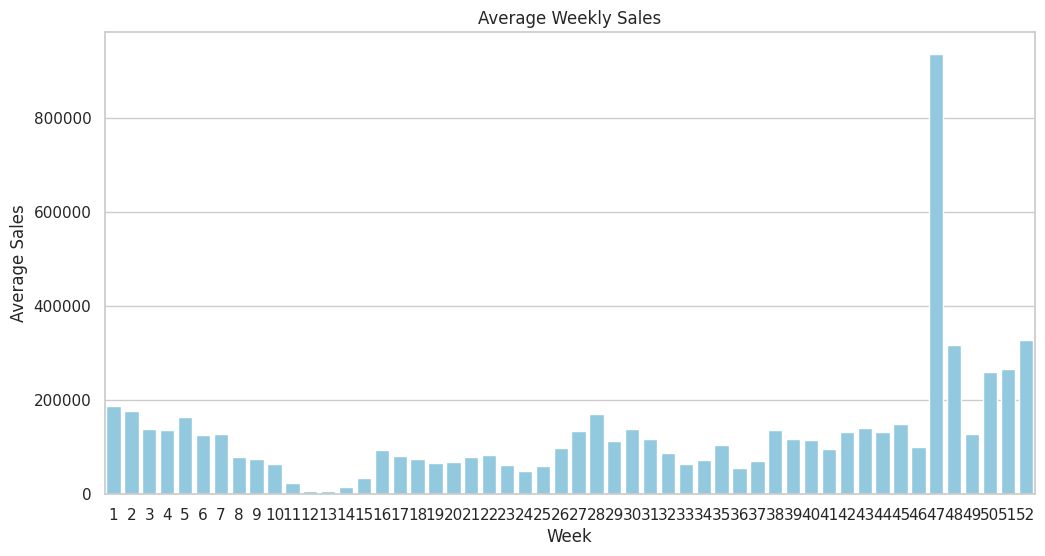

In [11]:
import matplotlib.pyplot as plt

# Reset the index to have 'week' and 'year' as regular columns
weekly_sales_reset = weekly_sales.reset_index()


# Set up Seaborn style
sns.set(style="whitegrid")
# Calculate the average weekly sales
average_weekly_sales = weekly_sales_reset.groupby("week")["total_paid"].mean().reset_index()

# Create a bar plot for average weekly sales
plt.figure(figsize=(12, 6))
sns.barplot(data=average_weekly_sales, x="week", y="total_paid", color="skyblue")
plt.title("Average Weekly Sales")
plt.xlabel("Week")
plt.ylabel("Average Sales")
plt.show()



<ipython-input-12-610d40d5ffbc>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_products_2017 = data_jan_2017.groupby('sku').sum()['product_quantity'].nlargest(10)
<ipython-input-12-610d40d5ffbc>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_products_2018 = data_jan_2018.groupby('sku').sum()['product_quantity'].nlargest(10)


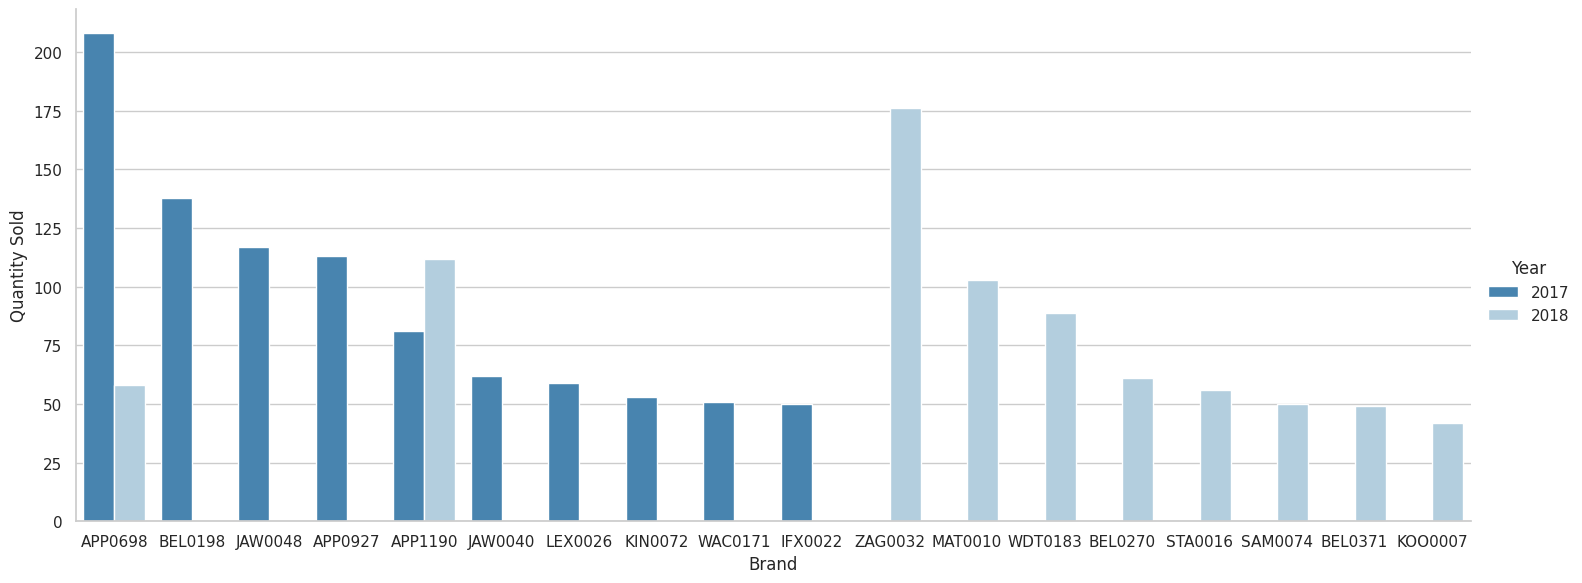

In [12]:
 # your code here
brands.head(2)
orderlines["short"] = orderlines["sku"].str[:3]

orderlines['date'] = pd.to_datetime(orderlines['date'])

ol_with_brands_df = orderlines.merge(brands,
                                how="left",
                                on="short")



data_jan_2017 = ol_with_brands_df[(ol_with_brands_df['date'].dt.year == 2017) & (ol_with_brands_df['date'].dt.month == 1)]
data_jan_2018 = ol_with_brands_df[(ol_with_brands_df['date'].dt.year == 2018) & (ol_with_brands_df['date'].dt.month == 1)]

top_products_2017 = data_jan_2017.groupby('sku').sum()['product_quantity'].nlargest(10)
top_products_2018 = data_jan_2018.groupby('sku').sum()['product_quantity'].nlargest(10)

top_products_2017_df= pd.DataFrame(top_products_2017)
top_products_2018_df= pd.DataFrame(top_products_2018)

top_products_2017_df['Year'] = 2017
top_products_2018_df['Year'] = 2018

combined_data_df = pd.concat([top_products_2017_df, top_products_2018_df]).reset_index()
combined_data_df.columns = ['Brand', 'Quantity Sold', 'Year']

sns.catplot(kind="bar",
            data=combined_data_df,
            x="Brand",
            y="Quantity Sold",
            hue="Year",
            height=6,
            aspect=2.5,
            palette="Blues_r")


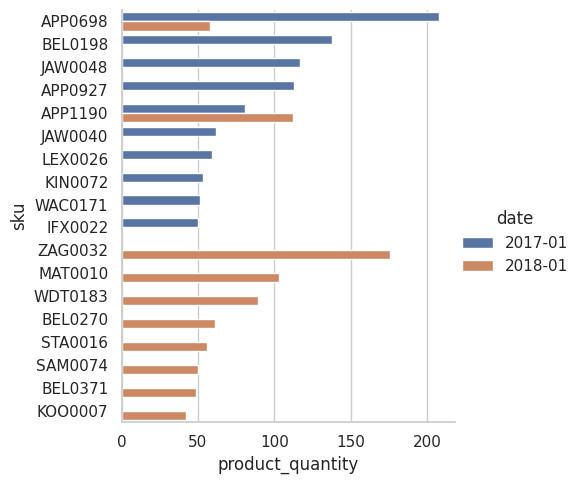

In [13]:
# your code here
# Ensure the 'date' column is in datetime format
orderlines['date'] = pd.to_datetime(orderlines['date'])

# Operations for January 2017
jan_2017 = orderlines.loc[orderlines["date"].dt.to_period('M') == '2017-01'].groupby("sku").product_quantity.sum().reset_index().nlargest(10, "product_quantity")
jan_2017["date"] = '2017-01'

# Operations for January 2018
# Ensure to reference orderlines correctly here
jan_2018 = orderlines.loc[orderlines["date"].dt.to_period('M') == '2018-01'].groupby("sku").product_quantity.sum().reset_index().nlargest(10, "product_quantity")
jan_2018["date"] = '2018-01'

# Concatenate dataframes
top_sellers = pd.concat([jan_2017, jan_2018])

# Plotting
sns.catplot(
    data=top_sellers,
    kind="bar",
    y="sku",
    x="product_quantity",
    hue="date"
)


# DISCOUNTS

In [50]:
disc_an = orderlines.merge(products, how="left", on="sku")[["sku", "unit_price", "price", "date" ]]

In [51]:
disc_an["discounts"] = disc_an["price"] - disc_an["unit_price"]

In [52]:
disc_an["discounts"].describe()

count    53231.000000
mean        26.116673
std         45.545881
min       -170.990000
25%          5.250000
50%         15.000000
75%         31.000000
max       1320.000000
Name: discounts, dtype: float64

In [24]:
#disc_an

In [53]:
# Remove Outliers
q1 = disc_an["discounts"].quantile(0.25)
q3 = disc_an["discounts"].quantile(0.75)
iqr = q3-q1
disc_an.shape

(53231, 5)

In [42]:

# Create a histogram of discount amounts
#plt.figure(figsize=(10, 6))
#sns.histplot(data=disc_an, x='discounts', bins=30, kde=True)
#plt.title("Distribution of Discounts")
#plt.xlabel("Discount Amount")
#plt.ylabel("Frequency")
#plt.show()


In [54]:
disc_an = disc_an.loc[(disc_an["discounts"] > (q1 - 1.5*iqr)) & (disc_an["discounts"] < (q3 + 1.5*iqr))]
disc_an

,sku,unit_price,price,date,discounts
0,LAC0212,129.16,139.99,2017-11-06 12:47:20,10.83
1,PAR0074,10.77,17.99,2017-12-31 17:26:40,7.22
2,OWC0074,77.99,99.99,2017-02-15 17:07:44,22.00
3,TAD0007,149.00,179.00,2017-06-28 11:12:30,30.00
4,PAC1561,52.99,103.95,2017-01-21 12:49:00,50.96
...,...,...,...,...,...
53226,APP0927,13.99,35.00,2018-03-14 11:42:38,21.01
53227,APP0698,9.99,25.00,2018-03-14 11:49:01,15.01
53228,APP0698,9.99,25.00,2018-03-14 11:49:36,15.01
53229,APP0698,9.99,25.00,2018-03-14 11:54:35,15.01


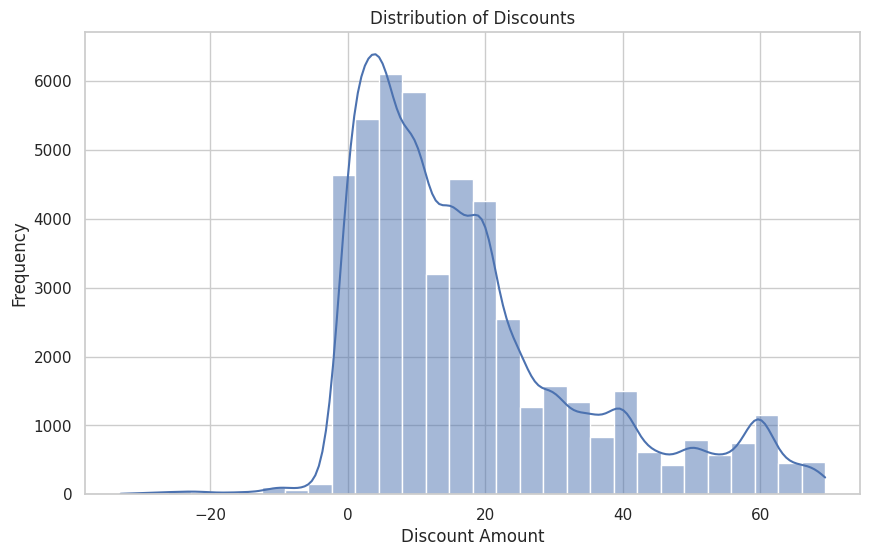

In [55]:

# Create a histogram of discount amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=disc_an, x='discounts', bins=30, kde=True)
plt.title("Distribution of Discounts")
plt.xlabel("Discount Amount")
plt.ylabel("Frequency")
plt.show()


In [57]:
# merge product discount with products
merged_df = pd.merge(disc_an, products, on=['sku', 'price'], how='inner')
merged_df.head(1)



,sku,unit_price,price,date,discounts,name,desc,in_stock,type
0,LAC0212,129.16,139.99,2017-11-06 12:47:20,10.83,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,1,11935397


In [29]:
# Create a scatter plot
#plt.figure(figsize=(10, 6))
#sns.relplot(data=merged_df, x="discounts", y="unit_price", palette=sns.color_palette('tab10'),
 #   aspect=4)
#plt.title("Correlation between Discounts and Unit Prices")
#plt.xlabel("Discount Amount")
#plt.ylabel("Unit Price")
#plt.show()

In [30]:
#numeric_columns = merged_df[['unit_price', 'price', 'discounts']]

# Calculate the correlation matrix
#correlation_matrix = numeric_columns.corr()

# Create a pairplot to visualize correlations
#sns.pairplot(data=numeric_columns, aspect=4)
#plt.suptitle("Correlation Plots of Numeric Variables vs. Discounts", y=1.02)

# Create a heatmap of the correlation matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
#plt.title("Correlation Matrix")
#plt.show()

In [59]:
Apple_df=merged_df.loc[merged_df["name"].str.contains("apple", case=False)]
Apple_df.head()

,sku,unit_price,price,date,discounts,name,desc,in_stock,type
455,APP1190,51.00,70.0,2017-11-19 22:32:48,19.00,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,1,1231
456,APP1190,51.00,70.0,2017-11-23 17:54:10,19.00,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,1,1231
457,APP1190,58.99,70.0,2017-01-02 23:46:35,11.01,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,1,1231
458,APP1190,58.99,70.0,2017-01-03 09:34:02,11.01,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,1,1231
459,APP1190,58.99,70.0,2017-01-03 12:14:35,11.01,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,1,1231


In [60]:
#disc_an.info()
Apple_df['year'] = Apple_df['date'].dt.year
Apple_df['month'] = Apple_df['date'].dt.month

# Group the data by year and month, and calculate the mean discount for each group
monthly_discounts = Apple_df.groupby(['year', 'month'])['discounts'].mean().reset_index()

# Calculate the correlation between 'discounts' and 'month'
correlation = monthly_discounts['discounts'].corr(monthly_discounts['month'])
corr = monthly_discounts['discounts'].corr(monthly_discounts['year'])

print(f"Correlation between Discounts and Month: {correlation:.2f}")
print(f"Correlation between Discounts and Years: {corr:.2f}")

Correlation between Discounts and Month: 0.51
Correlation between Discounts and Years: -0.12


<ipython-input-60-f1e53d023d78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple_df['year'] = Apple_df['date'].dt.year
<ipython-input-60-f1e53d023d78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple_df['month'] = Apple_df['date'].dt.month


In [61]:
# correlation analyses Discount vs Unit Price
correlation_apple = Apple_df["discounts"].corr(Apple_df["unit_price"])
print(round(correlation_apple,2))

print(round(Apple_df["discounts"].corr(Apple_df["price"]),2))


0.39
0.45


In [62]:
total_rows_apple = len(Apple_df)
total_rows_merged = len(merged_df)

percentage_apple = (total_rows_apple / total_rows_merged) * 100

print(f"Percentage of Apple Products in the Total Dataset: {percentage_apple:.2f}%")

Percentage of Apple Products in the Total Dataset: 21.30%


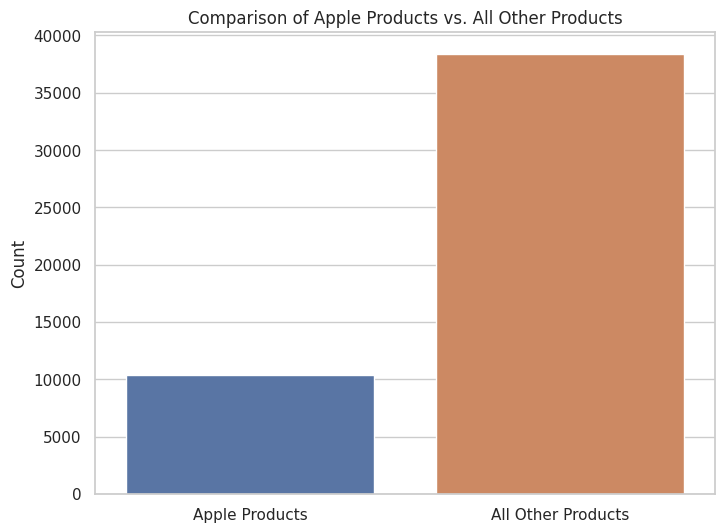

In [63]:
# Calculate the counts of Apple products and non-Apple products
total_rows_apple = len(Apple_df)
total_rows_other = len(merged_df) - total_rows_apple

# Create a bar plot to compare Apple products vs. all other products
plt.figure(figsize=(8, 6))
sns.barplot(x=['Apple Products', 'All Other Products'], y=[total_rows_apple, total_rows_other])
plt.title("Comparison of Apple Products vs. All Other Products")
plt.ylabel("Count")
plt.show()

<ipython-input-64-8efcf56b833e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple_df['year'] = Apple_df['date'].dt.year


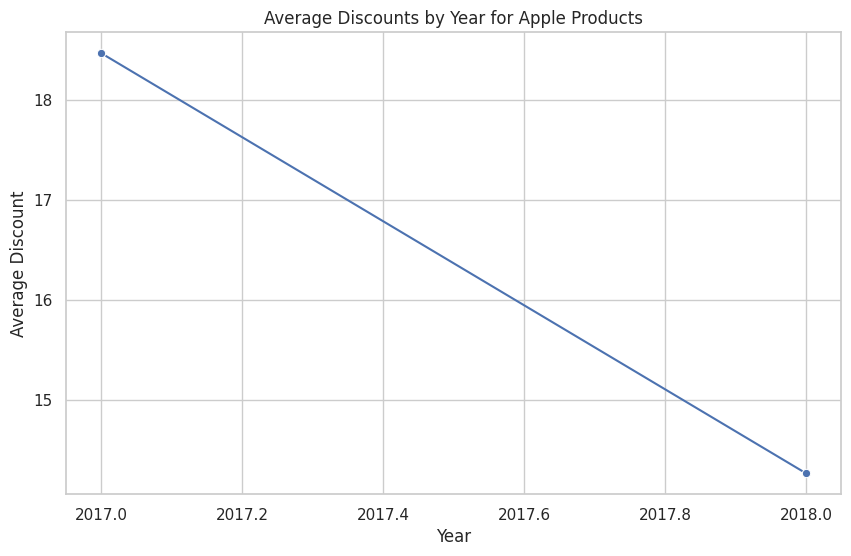

In [64]:
#Apple_df.head()
Apple_df['year'] = Apple_df['date'].dt.year

discounts_by_year = Apple_df.groupby('year')['discounts'].mean().reset_index()

# Create a line plot to visualize average discounts by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=discounts_by_year, x='year', y='discounts', marker='o')
plt.title("Average Discounts by Year for Apple Products")
plt.xlabel("Year")
plt.ylabel("Average Discount")
plt.show()


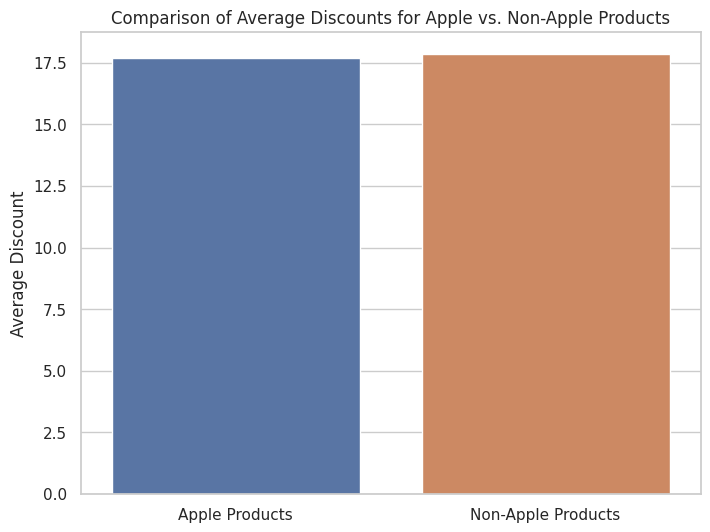

In [67]:
# Calculate average discounts for Apple and Non-Apple products
average_discount_apple = Apple_df['discounts'].mean()
average_discount_non_apple = merged_df['discounts'].mean()

# Create a bar plot to compare average discounts
plt.figure(figsize=(8, 6))
sns.barplot(x=['Apple Products', 'Non-Apple Products'], y=[average_discount_apple, average_discount_non_apple])
plt.title("Comparison of Average Discounts for Apple vs. Non-Apple Products")
plt.ylabel("Average Discount")
plt.show()

In [68]:
# Calculate summary statistics for 'discounts' attribute for both groups
apple_discount_stats = Apple_df['discounts'].describe()
non_apple_discount_stats = merged_df['discounts'].describe()

# Display summary statistics for both groups
print("Summary Statistics for Apple Products:")
print(apple_discount_stats)
print("\nSummary Statistics for Non-Apple Products:")
print(non_apple_discount_stats)


Summary Statistics for Apple Products:
count    10395.000000
mean        17.676443
std         17.421932
min        -29.180000
25%          5.000000
50%         14.010000
75%         20.010000
max         69.380000
Name: discounts, dtype: float64

Summary Statistics for Non-Apple Products:
count    48795.000000
mean        17.865059
std         16.983087
min        -33.000000
25%          5.000000
50%         13.200000
75%         25.000000
max         69.460000
Name: discounts, dtype: float64
